<a href="https://colab.research.google.com/github/akashbadal/ImageClassification_IndianActors/blob/main/IndianActors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
#re-size all the images to this
IMAGE_SIZE = [150,150]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_path = '/content/drive/MyDrive/Colab Notebooks/indian-actor-dataset/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/indian-actor-dataset/test'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top= False)

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/indian-actor-dataset/train/*')

In [9]:
#our layers - we can cadd more layers here
x = Flatten()(vgg.output)
# X = Dense(1000, activation = 'relu')(x)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
#create a model object
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
# Now let tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split =0.2)  #set validation Split



In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (150,150),   #last minute mistake of target size
                                                batch_size =16,
                                                class_mode ='categorical',
                                                 shuffle = True,
                                                subset ='training') # set as training data

Found 3801 images belonging to 135 classes.


In [14]:
valid_set = train_datagen.flow_from_directory(train_path,
                                           target_size = (150,150),
                                           batch_size =16,
                                           class_mode = 'categorical',
                                           shuffle = False,
                                             subset ='validation')

Found 893 images belonging to 135 classes.


In [15]:
r = model.fit_generator(
    training_set,
    validation_data=valid_set,
    epochs=25,
    steps_per_epoch=training_set.samples//16,
    validation_steps = valid_set.samples//16
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
237/237 [==============================] - 3110s 13s/step - loss: 5.4176 - accuracy: 0.0592 - val_loss: 4.6865 - val_accuracy: 0.1216
Epoch 2/25
237/237 [==============================] - 54s 226ms/step - loss: 3.0758 - accuracy: 0.3369 - val_loss: 4.6889 - val_accuracy: 0.1636
Epoch 3/25
237/237 [==============================] - 54s 229ms/step - loss: 2.0699 - accuracy: 0.5176 - val_loss: 4.4915 - val_accuracy: 0.1989
Epoch 4/25
237/237 [==============================] - 54s 227ms/step - loss: 1.5479 - accuracy: 0.6373 - val_loss: 4.3714 - val_accuracy: 0.2443
Epoch 5/25
237/237 [==============================] - 55s 231ms/step - loss: 1.1295 - accuracy: 0.7345 - val_loss: 4.2966 - val_accuracy: 0.2602
Epoch 6/25
237/237 [==============================] - 53s 224ms/step - loss: 0.8534 - accuracy: 0.8021 - val_loss: 4.3264 - val_accuracy: 0.2625
Epoch 7/25
237/237 [==============================] - 53s 224ms/step - loss: 0.6043 - accuracy: 0.8727 - val_loss: 4.3456 - val_ac

In [16]:
from google import colab
%cd /content/drive/MyDrive/DC/


/content/drive/MyDrive/DC


In [17]:
model.save('content/content/drive/MyDrive/DC/Indianactors_model16_16_25.h5')

In [18]:
r.history

{'loss': [5.417574405670166,
  3.075767755508423,
  2.0699048042297363,
  1.5478878021240234,
  1.1294875144958496,
  0.8534411787986755,
  0.6043187379837036,
  0.4920203685760498,
  0.3907087743282318,
  0.31272444128990173,
  0.26720279455184937,
  0.22183220088481903,
  0.19489414989948273,
  0.19338193535804749,
  0.16391132771968842,
  0.16158455610275269,
  0.14306765794754028,
  0.13525433838367462,
  0.14854565262794495,
  0.16702553629875183,
  0.142008438706398,
  0.1822759062051773,
  0.17834991216659546,
  0.11742916703224182,
  0.09689688682556152],
 'accuracy': [0.05918097868561745,
  0.33685600757598877,
  0.517569363117218,
  0.6372523307800293,
  0.7344781756401062,
  0.8021135926246643,
  0.8726552128791809,
  0.8937912583351135,
  0.9151915311813354,
  0.9384412169456482,
  0.9431968331336975,
  0.9564068913459778,
  0.9630118608474731,
  0.9595772624015808,
  0.9672390818595886,
  0.9645971059799194,
  0.9706737399101257,
  0.9682959318161011,
  0.9672390818595886,

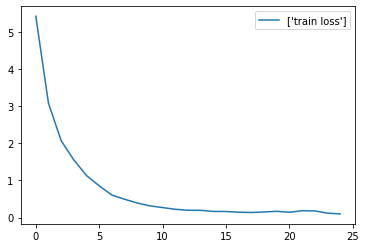

In [19]:
plt.plot(r.history['loss'],label =['train loss'])
plt.legend()
plt.draw()
plt.savefig("LossVal_loss")

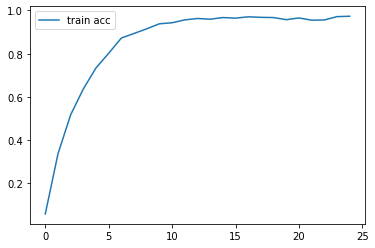

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'],label ='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
image_pred = image.load_img(r'/content/drive/MyDrive/Colab Notebooks/indian-actor-dataset/test/test1/0d09dbd4e1.jpg',target_size =(224,224))
image_pred = image.img_to_array(image_pred)
image_pred = np.expand_dims(image_pred,axis =0)

In [22]:
from tensorflow import keras
model = keras.models.load_model('content/content/drive/MyDrive/DC/Indianactors_model1.h5')

In [23]:
mod_pred = model.predict(image_pred)
#mod_pred_prob = model.predict_proba(image_pred)
print(mod_pred)

ValueError: ignored

In [ ]:
for j,i in enumerate(folders):
    i = i.replace('indian-actor-dataset/indian-actor-dataset/train\\','')
    if (mod_pred[0][j]>0.5):
        print("{}".format(j),i)